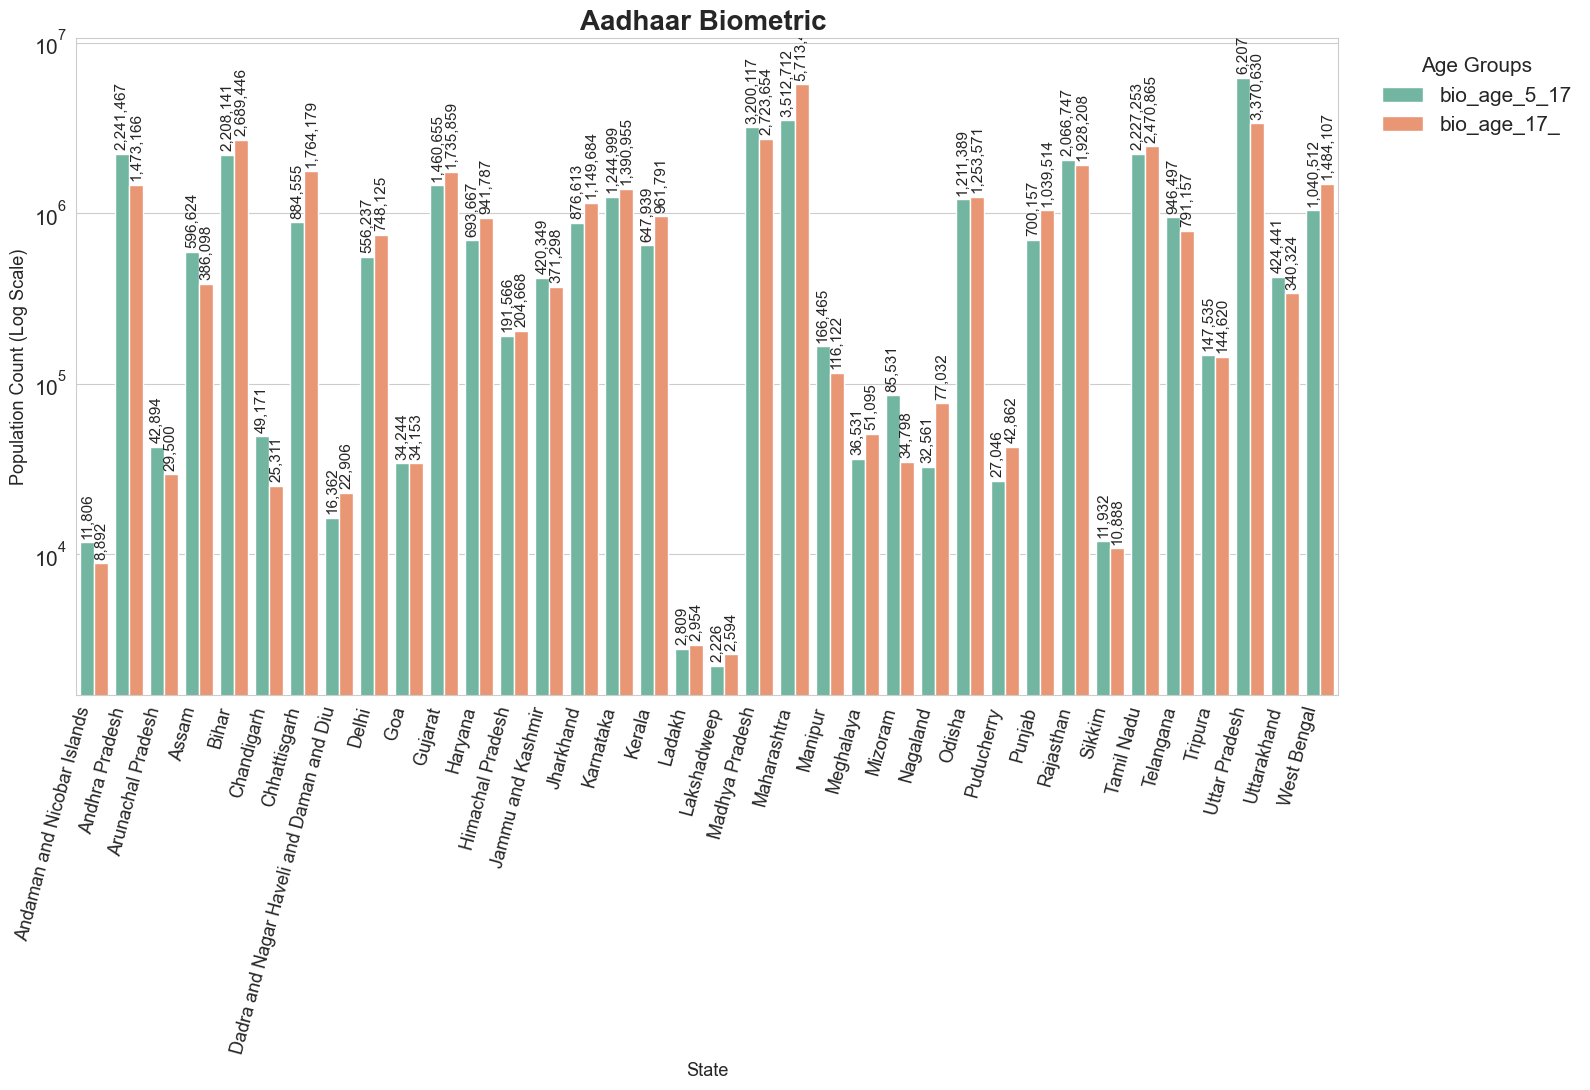

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("statewise_bio_age_.csv")

df_melted = df.melt(id_vars="state", 
                    value_vars=["bio_age_5_17", "bio_age_17_"], 
                    var_name="Age Group", 
                    value_name="Population")

df["total"] = df["bio_age_5_17"] + df["bio_age_17_"]

state_order = sorted(df["state"].unique())

plt.figure(figsize=(16,11))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_melted, 
                 x="state", 
                 y="Population", 
                 hue="Age Group", 
                 order=state_order, 
                 palette="Set2", 
                 dodge=0.6)

ax.set_yscale("log")

for p in ax.patches:
    value = int(p.get_height())
    if value > 0:
        offset = value * 0.05
        ax.annotate(f'{value:,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + offset), 
                    ha='center', va='bottom', fontsize=11, rotation=90,
                    clip_on=True)

plt.xticks(rotation=75, ha="right", fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("State", fontsize=13)
plt.ylabel("Population Count (Log Scale)", fontsize=13)
plt.title("Aadhaar Biometric ", fontsize=20, fontweight="bold")

plt.legend(title="Age Groups", fontsize=15, title_fontsize=15,
           loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.15)

plt.tight_layout()
plt.show()
